In [161]:
%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter

In [162]:

symbolList =  ['NVDA', 'F', 'CHUY', 'NKE', 'BLK'] # Nvidia, ford, restruant chain, nike, blackrock
START_DATE = '2015-07-01' # asset data start date 
END_DATE = '2024-07-01' # asset data end date


In [163]:
stockPxList = yf.download(symbolList, START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()

[*********************100%%**********************]  5 of 5 completed


In [164]:
stockPxList

Ticker,BLK,CHUY,F,NKE,NVDA
Date,,,,,
2015-07-01,275.754333,26.660000,9.383730,49.516712,0.493861
2015-07-02,274.166840,26.740000,9.308608,49.715820,0.494345
2015-07-06,272.111023,27.400000,9.258531,49.702236,0.488292
2015-07-07,271.952209,27.650000,9.296090,50.358349,0.479093
2015-07-08,265.213165,27.400000,8.995611,49.444313,0.475704
...,...,...,...,...,...
2024-06-24,798.950012,25.790001,12.230000,97.169998,118.110001
2024-06-25,794.390015,25.389999,12.090000,94.750000,126.089996
2024-06-26,787.450012,25.490000,12.110000,94.059998,126.400002


In [165]:
print(stockLogRetList)

Ticker           BLK      CHUY         F       NKE      NVDA
Date                                                        
2015-07-02 -0.005774  0.002996 -0.008038  0.004013  0.000979
2015-07-06 -0.007527  0.024382 -0.005394 -0.000273 -0.012318
2015-07-07 -0.000584  0.009083  0.004049  0.013114 -0.019020
2015-07-08 -0.025092 -0.009083 -0.032857 -0.018317 -0.007099
2015-07-09  0.008256  0.022732 -0.002788  0.001555 -0.012289
...              ...       ...       ...       ...       ...
2024-06-24  0.014308  0.007004  0.032408 -0.000103 -0.069179
2024-06-25 -0.005724 -0.015631 -0.011513 -0.025220  0.065380
2024-06-26 -0.008775  0.003931  0.001653 -0.007309  0.002456
2024-06-27 -0.008058  0.012476  0.009860  0.001381 -0.019251
2024-06-28  0.007893  0.004253  0.025032 -0.222905 -0.003636

[2263 rows x 5 columns]


Visualization #1: Log returns time plot

<AxesSubplot:title={'center':'NVDA Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

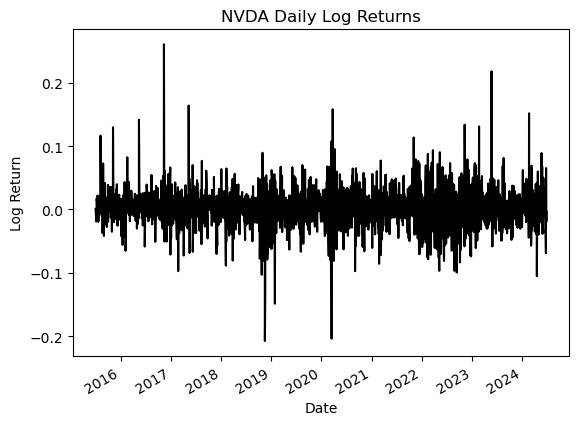

In [172]:
stockLogRetList[symbolList[0]].plot(title = symbolList[0] + ' Daily Log Returns', xlabel = 'Date', ylabel = 'Log Return', color = 'k')


<AxesSubplot:title={'center':'F Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

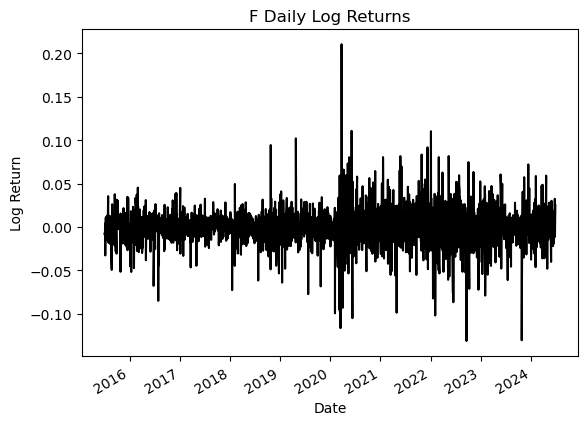

In [168]:
stockLogRetList[symbolList[1]].plot(title = symbolList[1] + ' Daily Log Returns', xlabel = 'Date', ylabel = 'Log Return', color = 'k')

<AxesSubplot:title={'center':'CHUY Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

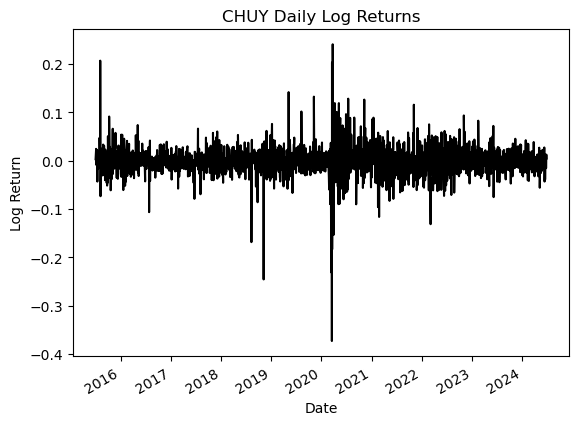

In [169]:
stockLogRetList[symbolList[2]].plot(title = symbolList[2] + ' Daily Log Returns', xlabel = 'Date', ylabel = 'Log Return', color = 'k')


<AxesSubplot:title={'center':'NKE Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

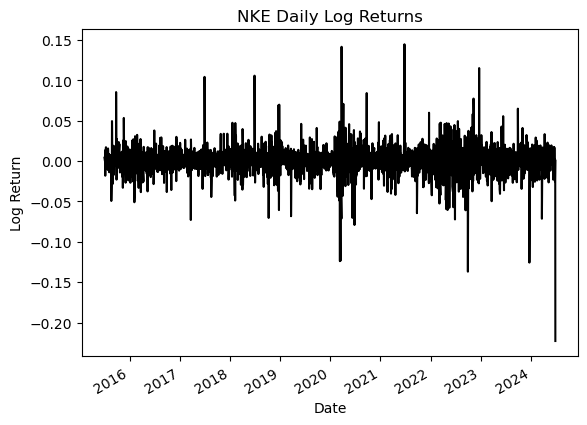

In [170]:
stockLogRetList[symbolList[3]].plot(title = symbolList[3] + ' Daily Log Returns', xlabel = 'Date', ylabel = 'Log Return', color = 'k')


<AxesSubplot:title={'center':'BLK Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

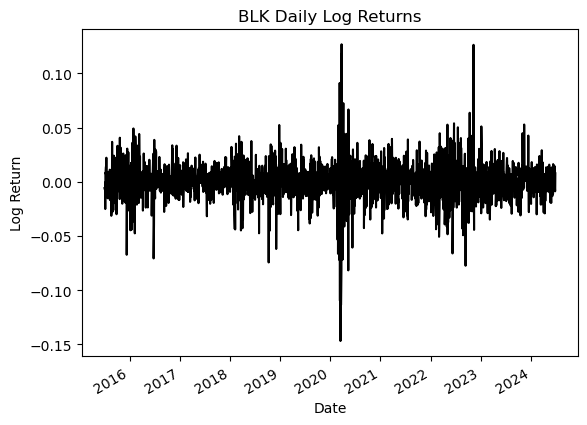

In [171]:
stockLogRetList[symbolList[4]].plot(title = symbolList[4] + ' Daily Log Returns', xlabel = 'Date', ylabel = 'Log Return', color = 'k')


Visualization #2: Correlation Heatmap

Text(0.5, 1.0, 'Correlations Between Stock Log Returns')

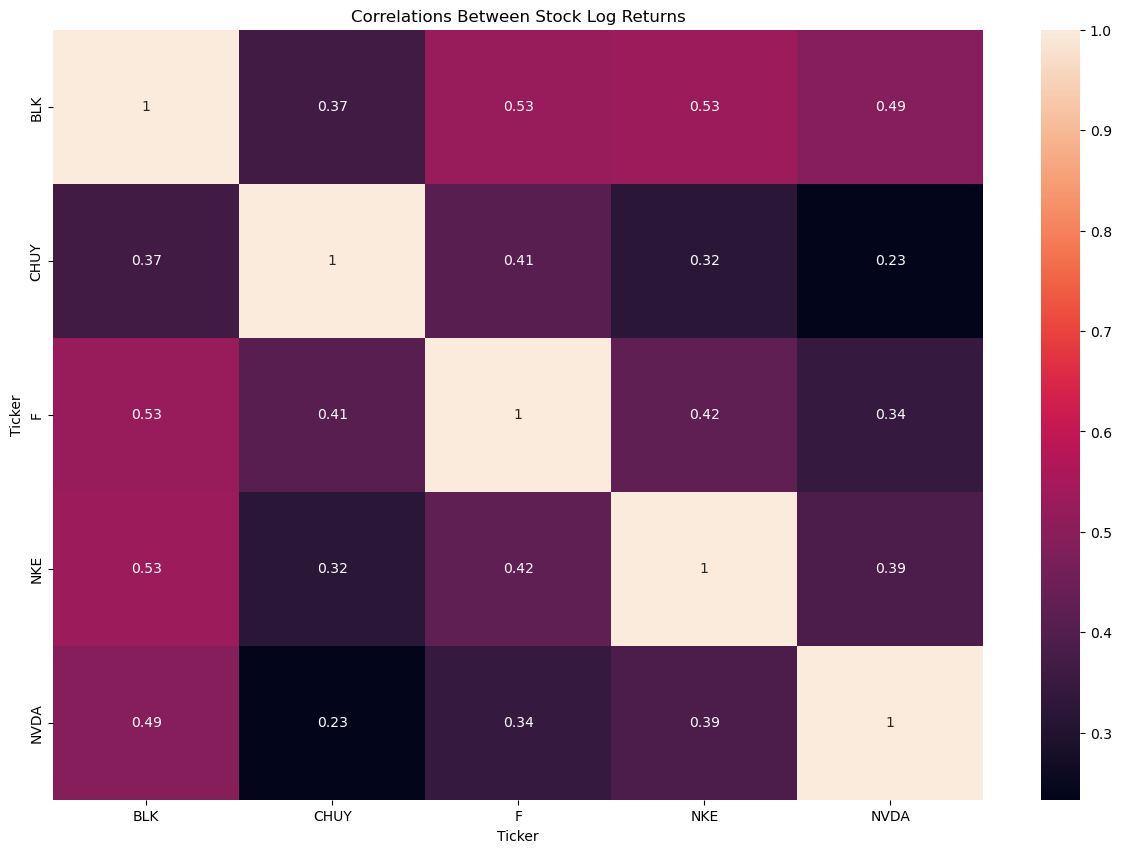

In [127]:

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(stockLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock Log Returns") 



There is volitatlity clustering with periods of high volatility followed by more high volatility and vice versa. Overall, all the log return vs date timeplots exhibit stable volatility centering around 0.0 log return, except for "NVDA" and "F" or Ford (after 2020). Because "NVDA" and "F" seems more like a high-volatility stock, out of all the 5 options, they would be the best for short-term trading. Another similarity between all the graphs are a spike some time between 2020-2021. The cause of this is most likely due to COVID and shutdowns. 

The correlation heatmap shows values above 0.2 indicating all the stocks have a weak positive relationship with each other. The low was 0.23 between "CHUY" and "NVDA", and a tie for high at 0.53 between "NVDA" and "BLK" & "BLK" and "F". Becuase all of relationships are weak, it means that it is safe to own all the stocks in your portfolio together because the stocks do not correlate with each other.


## Preliminary Normality Testing

Some dates within the range has outlier swing events which skew the data or thickens the probabilities of extreme values.


In [173]:
for ticker in symbolList:
    shapiro_test = stats.shapiro(stockLogRetList[ticker])
    print(ticker + ":" + str(shapiro_test.pvalue))

NVDA:5.9041628109598526e-30
F:8.494190945461373e-32
CHUY:1.1916081621232514e-40
NKE:6.759889015275275e-39
BLK:2.5087885326668974e-33


Because the dataset has less than 2000 samples, using the Shapiro-Wilk normality test is more effective. The p-values for all 5 stocks is less than 0.05, indicating that we reject the null-hypothesis and conclude that the log return samples for NVDA, NKE, BLK, CHUY, and F all come from a non-normal distribution.

## Preliminary Pre-processing

In [149]:
TICKER = 'NVDA' # asset ticker symbol

Binarize the returns for the asset that you're trying to predict over the period specified above. In other words, the asset's price will be transformed into 0's and 1's - 0 if price did not go up, 1 if price went up.



[*********************100%%**********************]  1 of 1 completed


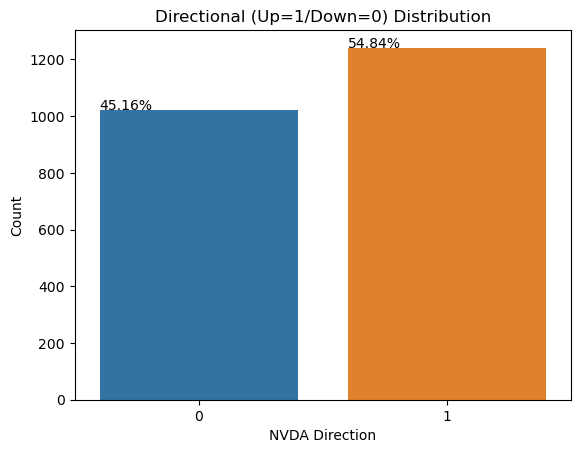

In [150]:
FEATURES = symbolList.copy()
stockPx = yf.download(TICKER, START_DATE, END_DATE)['Adj Close'] # storing adjusted stock prices into a variable 
stockPx01 = (stockPx.pct_change().dropna() > 0).astype(int)
# visualize directional label distribution
ax = sns.countplot(x = stockPx01)
plt.title('Directional (Up=1/Down=0) Distribution')
plt.xlabel(TICKER + ' Direction')
plt.ylabel('Count')
total = len(stockPx01)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [151]:
print(stockLogRetList)

Ticker           BLK      CHUY         F       NKE      NVDA
Date                                                        
2015-07-02 -0.005774  0.002996 -0.008038  0.004013  0.000979
2015-07-06 -0.007527  0.024382 -0.005394 -0.000273 -0.012318
2015-07-07 -0.000584  0.009083  0.004049  0.013114 -0.019020
2015-07-08 -0.025092 -0.009083 -0.032857 -0.018317 -0.007099
2015-07-09  0.008256  0.022732 -0.002788  0.001555 -0.012289
...              ...       ...       ...       ...       ...
2024-06-24  0.014308  0.007004  0.032408 -0.000103 -0.069179
2024-06-25 -0.005724 -0.015631 -0.011513 -0.025220  0.065380
2024-06-26 -0.008775  0.003931  0.001653 -0.007309  0.002456
2024-06-27 -0.008058  0.012476  0.009860  0.001381 -0.019251
2024-06-28  0.007893  0.004253  0.025032 -0.222905 -0.003636

[2263 rows x 5 columns]


In [152]:
print(stockPx01)

Date
2015-07-02    1
2015-07-06    0
2015-07-07    0
2015-07-08    0
2015-07-09    0
             ..
2024-06-24    0
2024-06-25    1
2024-06-26    1
2024-06-27    0
2024-06-28    0
Name: Adj Close, Length: 2263, dtype: int64


The labels seem well balanced with a near 50-50 ratio with 45.16% down and 54.84% up. The near even balance can contirbute to an unbias data set that our model runs on.  

In [174]:
#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
#inconsistent data size (resolved: remvoed LCID and changed to Ford - LCID did not have data in 2015,2016.. making data inconsistent)
X_train, X_test, y_train, y_test = train_test_split(stockLogRetList, stockPx01, test_size=0.2, train_size=0.8, random_state=0)


Text(0.5, 0, 'Importance Score')

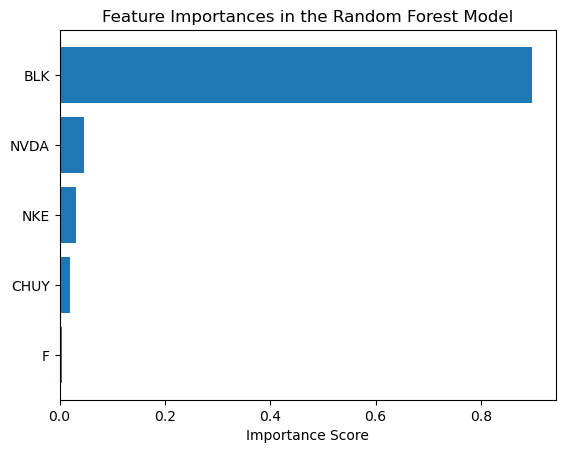

In [175]:
from sklearn.ensemble import RandomForestClassifier # importing the random forest module
rf_model = RandomForestClassifier(random_state=0) # define the random forest model
rf_model.fit(X_train, y_train) # fit the random forest model
importances = rf_model.feature_importances_ # get importance
indices = np.argsort(importances) # sort the features' index by their importance scores

# visualizing importance scores by features (ranked)
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Importance Score')



In [176]:
print(importances) #['NVDA', 'F', 'CHUY', 'NKE', 'BLK']

[0.0471783  0.00489459 0.02047799 0.03037046 0.89707867]


The features are ranked based on them predicting the direction of NVDA's log return with BLK's log return as the most important followed by NVDA, then NKE, then CHUY, then F's log return. Using the standard feature importance score threshold of 0.05, all the features except 'BLK' are dropped because all the other stocks have a feature importance score less than 0.05.